In [2]:
!pip install NLTK --break-system-packages

Defaulting to user installation because normal site-packages is not writeable


# Let's start by importing the necessary libraries


In [4]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import regexp_tokenize
from nltk.probability import FreqDist
import string

# Ensure that necessary NLTK datasets are downloaded


In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/mohamed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mohamed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mohamed/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
# Sample text in Arabic and English
text_arabic = "الذكاء الاصطناعي هو المستقبل. الذكاء الاصطناعي يعزز حياة الإنسان. المستقبل الذكاء."
text_english = "Artificial intelligence is the future. Artificial intelligence improves human life. The future of Artificial intelligence is bright."

# Display the text
print("Arabic Text:", text_arabic)
print("English Text:", text_english)

Arabic Text: الذكاء الاصطناعي هو المستقبل. الذكاء الاصطناعي يعزز حياة الإنسان. المستقبل الذكاء.
English Text: Artificial intelligence is the future. Artificial intelligence improves human life. The future of Artificial intelligence is bright.


# Step 1: Tokenization

**Explanation: Tokenization is the process of breaking a sentence into smaller units like words or sentences. It’s essential for almost all text processing tasks**

## 1-Word Based

In [7]:
# Tokenize text into words
tokens_arabic = word_tokenize(text_arabic)
tokens_english = word_tokenize(text_english)

# Display tokens
print("Tokens for Arabic Text:", tokens_arabic)
print("Tokens for English Text:", tokens_english)

Tokens for Arabic Text: ['الذكاء', 'الاصطناعي', 'هو', 'المستقبل', '.', 'الذكاء', 'الاصطناعي', 'يعزز', 'حياة', 'الإنسان', '.', 'المستقبل', 'الذكاء', '.']
Tokens for English Text: ['Artificial', 'intelligence', 'is', 'the', 'future', '.', 'Artificial', 'intelligence', 'improves', 'human', 'life', '.', 'The', 'future', 'of', 'Artificial', 'intelligence', 'is', 'bright', '.']


## 2-Character Based

In [8]:
C_tokens_arabic  = [char for char in text_arabic]
C_tokens_english = [char for char in text_english]

# Display tokens
print("Tokens for Arabic Text:", C_tokens_arabic)
print("Tokens for English Text:", C_tokens_english)

Tokens for Arabic Text: ['ا', 'ل', 'ذ', 'ك', 'ا', 'ء', ' ', 'ا', 'ل', 'ا', 'ص', 'ط', 'ن', 'ا', 'ع', 'ي', ' ', 'ه', 'و', ' ', 'ا', 'ل', 'م', 'س', 'ت', 'ق', 'ب', 'ل', '.', ' ', 'ا', 'ل', 'ذ', 'ك', 'ا', 'ء', ' ', 'ا', 'ل', 'ا', 'ص', 'ط', 'ن', 'ا', 'ع', 'ي', ' ', 'ي', 'ع', 'ز', 'ز', ' ', 'ح', 'ي', 'ا', 'ة', ' ', 'ا', 'ل', 'إ', 'ن', 'س', 'ا', 'ن', '.', ' ', 'ا', 'ل', 'م', 'س', 'ت', 'ق', 'ب', 'ل', ' ', 'ا', 'ل', 'ذ', 'ك', 'ا', 'ء', '.']
Tokens for English Text: ['A', 'r', 't', 'i', 'f', 'i', 'c', 'i', 'a', 'l', ' ', 'i', 'n', 't', 'e', 'l', 'l', 'i', 'g', 'e', 'n', 'c', 'e', ' ', 'i', 's', ' ', 't', 'h', 'e', ' ', 'f', 'u', 't', 'u', 'r', 'e', '.', ' ', 'A', 'r', 't', 'i', 'f', 'i', 'c', 'i', 'a', 'l', ' ', 'i', 'n', 't', 'e', 'l', 'l', 'i', 'g', 'e', 'n', 'c', 'e', ' ', 'i', 'm', 'p', 'r', 'o', 'v', 'e', 's', ' ', 'h', 'u', 'm', 'a', 'n', ' ', 'l', 'i', 'f', 'e', '.', ' ', 'T', 'h', 'e', ' ', 'f', 'u', 't', 'u', 'r', 'e', ' ', 'o', 'f', ' ', 'A', 'r', 't', 'i', 'f', 'i', 'c', 'i', 'a', 'l',

# Step 2: Stopword Removal

**Explanation: Stopwords are words that do not carry meaningful information, such as "is", "the", and "and". Removing them improves the focus on significant words**

In [9]:
# Get stopwords for both Arabic and English
stop_words_arabic  = set(stopwords.words("arabic"))
stop_words_english = set(stopwords.words("english"))

# Remove stopwords from tokenized text
filtered_arabic_tokens = [word for word in tokens_arabic if word not in stop_words_arabic]
filtered_english_tokens = [word for word in tokens_english if word.lower() not in stop_words_english]

In [10]:
print(stop_words_arabic)

{'ذات', 'نبَّا', 'أمس', 'وَيْ', 'نون', 'سنتيم', 'استحال', 'إزاء', 'فإن', 'أين', 'عند', 'حبذا', 'إيهٍ', 'غادر', 'ئ', 'خاء', 'إلا', 'بيد', 'كأين', 'حاشا', 'أفعل به', 'تاء', 'لدن', 'هَاتِه', 'هللة', 'إليكن', 'جويلية', 'سرعان', 'إن', 'أيّ', 'هيّا', 'تاسع', 'تسعة', 'مع', 'ثمان', 'سابع', 'لبيك', 'آنفا', 'ثالث', 'أ', 'ذلك', 'ذِه', 'كليكما', 'فيفري', 'سبعين', 'لنا', 'هيهات', 'كليهما', 'ستين', 'لولا', 'تَيْنِ', 'تلكما', 'تِي', 'أمد', 'أطعم', 'حدَث', 'كى', 'ؤ', 'غ', 'غير', 'إنَّ', 'س', 'عدَّ', 'ذ', 'حمدا', 'بما', 'قبل', 'م', 'ولو', 'ذه', 'صهٍ', 'واو', 'ياء', 'آها', 'دولار', 'ليسوا', 'غداة', 'ذلكما', 'ء', 'أعطى', 'لهن', 'ليست', 'ارتدّ', 'أخو', 'ترك', 'تسع', 'نحو', 'أربعاء', 'خميس', 'سبتمبر', 'ميم', 'مكانكما', 'هذه', 'هذي', 'أنت', 'واحد', 'كأي', 'بات', 'أنتن', 'جعل', 'له', 'سبعون', 'أقبل', 'هلا', 'ثمانون', 'حار', 'صراحة', 'أجمع', 'مارس', 'أخبر', 'هاك', 'درهم', 'ألفى', 'ك', 'غين', 'آه', 'تارة', 'يونيو', 'كأنما', 'أيار', 'مكانكنّ', 'كِخ', 'بهن', 'ليرة', 'تسعمائة', 'ثلاثين', 'نحن', 'أصبح', 'علًّ', 'ه

In [8]:
print(stop_words_english)

{'it', 'needn', "she's", "needn't", 'after', 'no', 'any', "isn't", 'not', 'same', 'this', "mightn't", 'itself', 'out', 'because', 'under', 'shan', 'is', 'during', 'to', 'shouldn', "it's", 'me', 'of', 'or', 'you', 'few', 'into', 'herself', 'was', 'until', 'has', 'both', 'weren', 'm', "don't", "won't", "you're", 'against', 'more', 'being', 'ma', 'just', 'off', 'o', 'won', 'on', 'll', 'his', 'had', 'they', 'having', 'from', 'down', 'up', 'mustn', 'when', 'now', 'ain', 'themselves', 'she', 'been', 'y', 'am', 'hasn', 'all', 'a', 'most', 'only', 'so', 'as', 'whom', 'the', 'than', 'with', "couldn't", 'these', 'nor', 'were', 'that', 'did', "wouldn't", 'and', 'above', 'yourselves', 'at', 'very', 'if', 'can', 'we', 'once', "doesn't", "that'll", 'about', 'why', 'him', 'your', 'aren', "hasn't", 'below', 'again', 'd', 'doesn', 've', "shan't", 'doing', 'didn', 'some', 'isn', "weren't", 're', 'wouldn', "haven't", 'here', 'will', "should've", 'each', "shouldn't", 'myself', "mustn't", 'their', 'ours', 

In [9]:
# Display filtered tokens
print("Filtered Arabic Tokens:", filtered_arabic_tokens)
print("Filtered English Tokens:", filtered_english_tokens)

Filtered Arabic Tokens: ['الذكاء', 'الاصطناعي', 'المستقبل', '.', 'الذكاء', 'الاصطناعي', 'يعزز', 'حياة', 'الإنسان', '.', 'المستقبل', 'الذكاء', '.']
Filtered English Tokens: ['Artificial', 'intelligence', 'future', '.', 'Artificial', 'intelligence', 'improves', 'human', 'life', '.', 'future', 'Artificial', 'intelligence', 'bright', '.']


# Step 3: Noise Removal

**Explanation: Noise removal involves cleaning the text from unnecessary or irrelevant information. This typically involves removing punctuation or special characters**

In [13]:
# Remove punctuation from tokens
punctuation = string.punctuation

filtered_arabic_tokens_no_punct = [word for word in filtered_arabic_tokens if word not in punctuation]
filtered_english_tokens_no_punct = [word for word in filtered_english_tokens if word not in punctuation]

# showing The Punctuation
print("Punctuation Elements :",punctuation)

# Display tokens after removing punctuation
print("\n\nFiltered Arabic Tokens without Punctuation:", filtered_arabic_tokens_no_punct)
print("\nFiltered English Tokens without Punctuation:", filtered_english_tokens_no_punct)

Punctuation Elements : !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Filtered Arabic Tokens without Punctuation: ['الذكاء', 'الاصطناعي', 'المستقبل', 'الذكاء', 'الاصطناعي', 'يعزز', 'حياة', 'الإنسان', 'المستقبل', 'الذكاء']

Filtered English Tokens without Punctuation: ['Artificial', 'intelligence', 'future', 'Artificial', 'intelligence', 'improves', 'human', 'life', 'future', 'Artificial', 'intelligence', 'bright']


# Step 5: Normalization

Explanation: Normalization refers to standardizing the text, which can include converting words to lowercase, removing redundant characters, etc**

In [14]:
# Normalize the text by converting to lowercase
normalized_arabic_tokens = [word.lower() for word in filtered_arabic_tokens_no_punct]
normalized_english_tokens = [word.lower() for word in filtered_english_tokens_no_punct]

# Display normalized tokens
print("Normalized Arabic Tokens:", normalized_arabic_tokens)
print("Normalized English Tokens:", normalized_english_tokens)

Normalized Arabic Tokens: ['الذكاء', 'الاصطناعي', 'المستقبل', 'الذكاء', 'الاصطناعي', 'يعزز', 'حياة', 'الإنسان', 'المستقبل', 'الذكاء']
Normalized English Tokens: ['artificial', 'intelligence', 'future', 'artificial', 'intelligence', 'improves', 'human', 'life', 'future', 'artificial', 'intelligence', 'bright']


# Step 5: POS Tagging (Part-of-Speech Tagging)

**Explanation: POS Tagging assigns a part-of-speech tag to each word in the text, such as noun (NN), verb (VB), etc**

In [15]:
# POS tagging for Arabic and English
pos_tags_arabic  = pos_tag(normalized_arabic_tokens)
pos_tags_english = pos_tag(normalized_english_tokens)

# Display POS tags
print("POS Tags for Arabic Tokens:", pos_tags_arabic)
print("POS Tags for English Tokens:", pos_tags_english)

POS Tags for Arabic Tokens: [('الذكاء', 'JJ'), ('الاصطناعي', 'NNP'), ('المستقبل', 'NNP'), ('الذكاء', 'NNP'), ('الاصطناعي', 'NNP'), ('يعزز', 'NNP'), ('حياة', 'NNP'), ('الإنسان', 'NNP'), ('المستقبل', 'NNP'), ('الذكاء', 'NN')]
POS Tags for English Tokens: [('artificial', 'JJ'), ('intelligence', 'NN'), ('future', 'JJ'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('improves', 'VBZ'), ('human', 'JJ'), ('life', 'NN'), ('future', 'JJ'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('bright', 'VBD')]


## Part-of-Speech (POS) Tags

## English POS Tags
| Tag  | Meaning                       | Example                 |
|------|-------------------------------|-------------------------|
| **CC** | Coordinating conjunction      | and, but, or            |
| **CD** | Cardinal number               | one, twenty, 7          |
| **DT** | Determiner                    | the, a, an, this, that  |
| **IN** | Preposition or conjunction     | in, on, at, by, because |
| **JJ** | Adjective                      | beautiful, large, happy |
| **NN** | Noun, singular                | cat, house              |
| **NNS** | Noun, plural                  | cats, houses            |
| **NNP** | Proper noun, singular         | John, London            |
| **VB** | Verb, base form               | go, see, be             |
| **VBD** | Verb, past tense              | went, saw, was         |
| **RB** | Adverb                        | quickly, very           |
| **PRP** | Personal pronoun              | I, you, he, she         |
| **MD** | Modal verb                    | can, should, will       |
| **TO** | To                             | to go, to see           |

## Arabic POS Tags
| Tag  | Meaning                       | Example                 |
|------|-------------------------------|-------------------------|
| **NN** | Noun (singular)               | كتاب (book), شارع (street)  |
| **NNS** | Noun (plural)                 | كتب (books), شوارع (streets) |
| **VB** | Verb                          | قرأ (read), ذهب (go)    |
| **JJ** | Adjective                      | جميل (beautiful), طويل (tall) |
| **RB** | Adverb                         | بسرعة (quickly), جيدا (well) |
| **IN** | Preposition or conjunction     | في (in), مع (with)      |
| **DT** | Determiner                     | هذا (this), تلك (that) |
| **NNP** |Proper noun, singular         | محمد (Mohammed), القاهرة (Cairo) |
| **PRP** | Pronoun                        | هو (he), هي (she)       |
| **POS** | Possessive marker             | -ي (my), -ه (his)       |


# Comparison

## Before

In [16]:
# Arabic text example with varied word frequencies
text_arabic = "الذكاء الاصطناعي هو المستقبل. الذكاء الاصطناعي يعزز حياة الإنسان. المستقبل الذكاء."
# English text example with varied word frequencies
text_english = "Artificial intelligence is the future. Artificial intelligence improves human life. The future of Artificial intelligence is bright."

Frequency Distribution for Arabic Text: <FreqDist with 8 samples and 14 outcomes>
Frequency Distribution for English Text: <FreqDist with 12 samples and 20 outcomes>


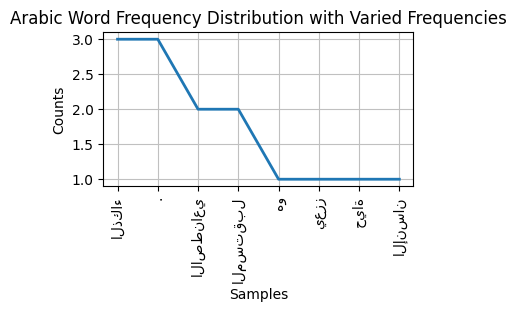

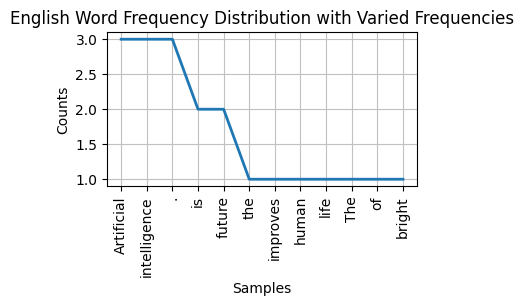

In [17]:
# Tokenization for Arabic and English
tokens_arabic = word_tokenize(text_arabic)
tokens_english = word_tokenize(text_english)

# Frequency distribution for Arabic and English
freq_dist_arabic = FreqDist(tokens_arabic)
freq_dist_english = FreqDist(tokens_english)

# Display frequency distribution
print("Frequency Distribution for Arabic Text:", freq_dist_arabic)
print("Frequency Distribution for English Text:", freq_dist_english)

# Plotting the frequency distribution
import matplotlib.pyplot as plt

# Plot for Arabic tokens
plt.figure(figsize=(4, 2))
freq_dist_arabic.plot(30, cumulative=False, title="Arabic Word Frequency Distribution with Varied Frequencies")
plt.show()

# Plot for English tokens
plt.figure(figsize=(4, 2))
freq_dist_english.plot(30, cumulative=False, title="English Word Frequency Distribution with Varied Frequencies")
plt.show()


## After

Frequency Distribution for Arabic Text: <FreqDist with 6 samples and 10 outcomes>
Frequency Distribution for English Text: <FreqDist with 7 samples and 12 outcomes>


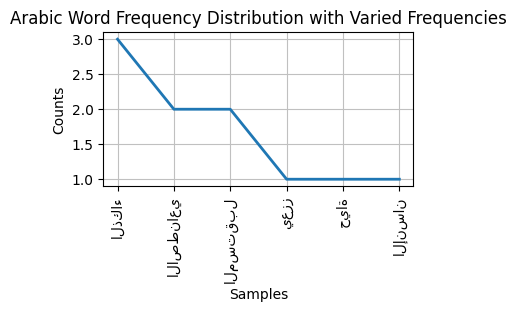

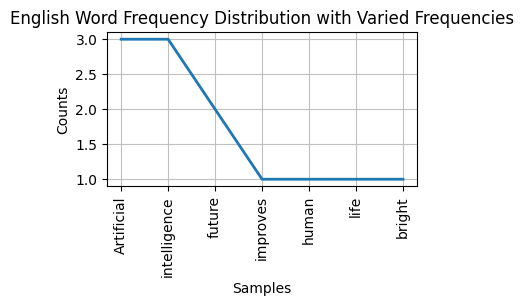

In [18]:
# Frequency distribution for Arabic and English
freq_dist_arabic = FreqDist(filtered_arabic_tokens_no_punct)
freq_dist_english = FreqDist(filtered_english_tokens_no_punct)

# Display frequency distribution
print("Frequency Distribution for Arabic Text:", freq_dist_arabic)
print("Frequency Distribution for English Text:", freq_dist_english)

# Plotting the frequency distribution
import matplotlib.pyplot as plt

# Plot for Arabic tokens
plt.figure(figsize=(4, 2))
freq_dist_arabic.plot(30, cumulative=False, title="Arabic Word Frequency Distribution with Varied Frequencies")
plt.show()

# Plot for English tokens
plt.figure(figsize=(4, 2))
freq_dist_english.plot(30, cumulative=False, title="English Word Frequency Distribution with Varied Frequencies")
plt.show()